<a href="https://colab.research.google.com/github/trungnguyen020/6351071072_LAB2/blob/main/6351071072_LAB2_BAI6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score

# 1. Đọc dữ liệu
# Dữ liệu nấm thường dùng ký tự '?' để chỉ dữ liệu thiếu, ta xử lý ngay khi đọc
try:
    df = pd.read_csv('mushrooms.csv', na_values='?')
except:
    df = pd.read_csv('mushrooms.csv')

# 2. Xóa dữ liệu trống
df.dropna(inplace=True)

print("Đã nhập dữ liệu Mushroom thành công.")
print(f"Tổng số mẫu: {len(df)}")
print(f"Các cột dữ liệu: {df.columns.tolist()}")
print("Nguyễn Đức Trung - 6351071072")

Đã nhập dữ liệu Mushroom thành công.
Tổng số mẫu: 5644
Các cột dữ liệu: ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
Nguyễn Đức Trung - 6351071072


In [3]:
# bài 6 trang 27 câu 4

target_col = 'class'

# Tách biến đầu vào X (các đặc điểm) và biến quyết định y (class: độc/ăn được)
X = df.drop(target_col, axis=1)
y = df[target_col]

print("Đã tách xong X và y.")
print(f"Kích thước X: {X.shape}")
print(f"Kích thước y: {y.shape}")

print("Nguyễn Đức Trung - 6351071072")

Đã tách xong X và y.
Kích thước X: (5644, 22)
Kích thước y: (5644,)
Nguyễn Đức Trung - 6351071072


In [4]:
# bài 6 trang 27 câu 5

# 1. Mã hóa One-Hot cho toàn bộ biến đầu vào X (vì tất cả đều là chữ cái)
X_encoded = pd.get_dummies(X, drop_first=True)

# 2. Mã hóa Label Encoder cho nhãn y (p/e -> 0/1)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("Đã mã hóa dữ liệu thành công.")
print(f"Kích thước X sau khi One-Hot: {X_encoded.shape}")
print(f"Các nhãn lớp (class): {le.classes_}")

print("Nguyễn Đức Trung - 6351071072")

Đã mã hóa dữ liệu thành công.
Kích thước X sau khi One-Hot: (5644, 76)
Các nhãn lớp (class): ['e' 'p']
Nguyễn Đức Trung - 6351071072


In [5]:
# bài 6 trang 27 câu 6

# Chia dữ liệu: 70% Huấn luyện - 30% Kiểm thử
# random_state=42 để cố định kết quả
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42)

print("Đã chia dữ liệu thành công (70-30):")
print(f"Train set: {X_train.shape}")
print(f"Test set:  {X_test.shape}")

print("Nguyễn Đức Trung - 6351071072")

Đã chia dữ liệu thành công (70-30):
Train set: (3950, 76)
Test set:  (1694, 76)
Nguyễn Đức Trung - 6351071072


Độ chính xác ID3: 100.00%


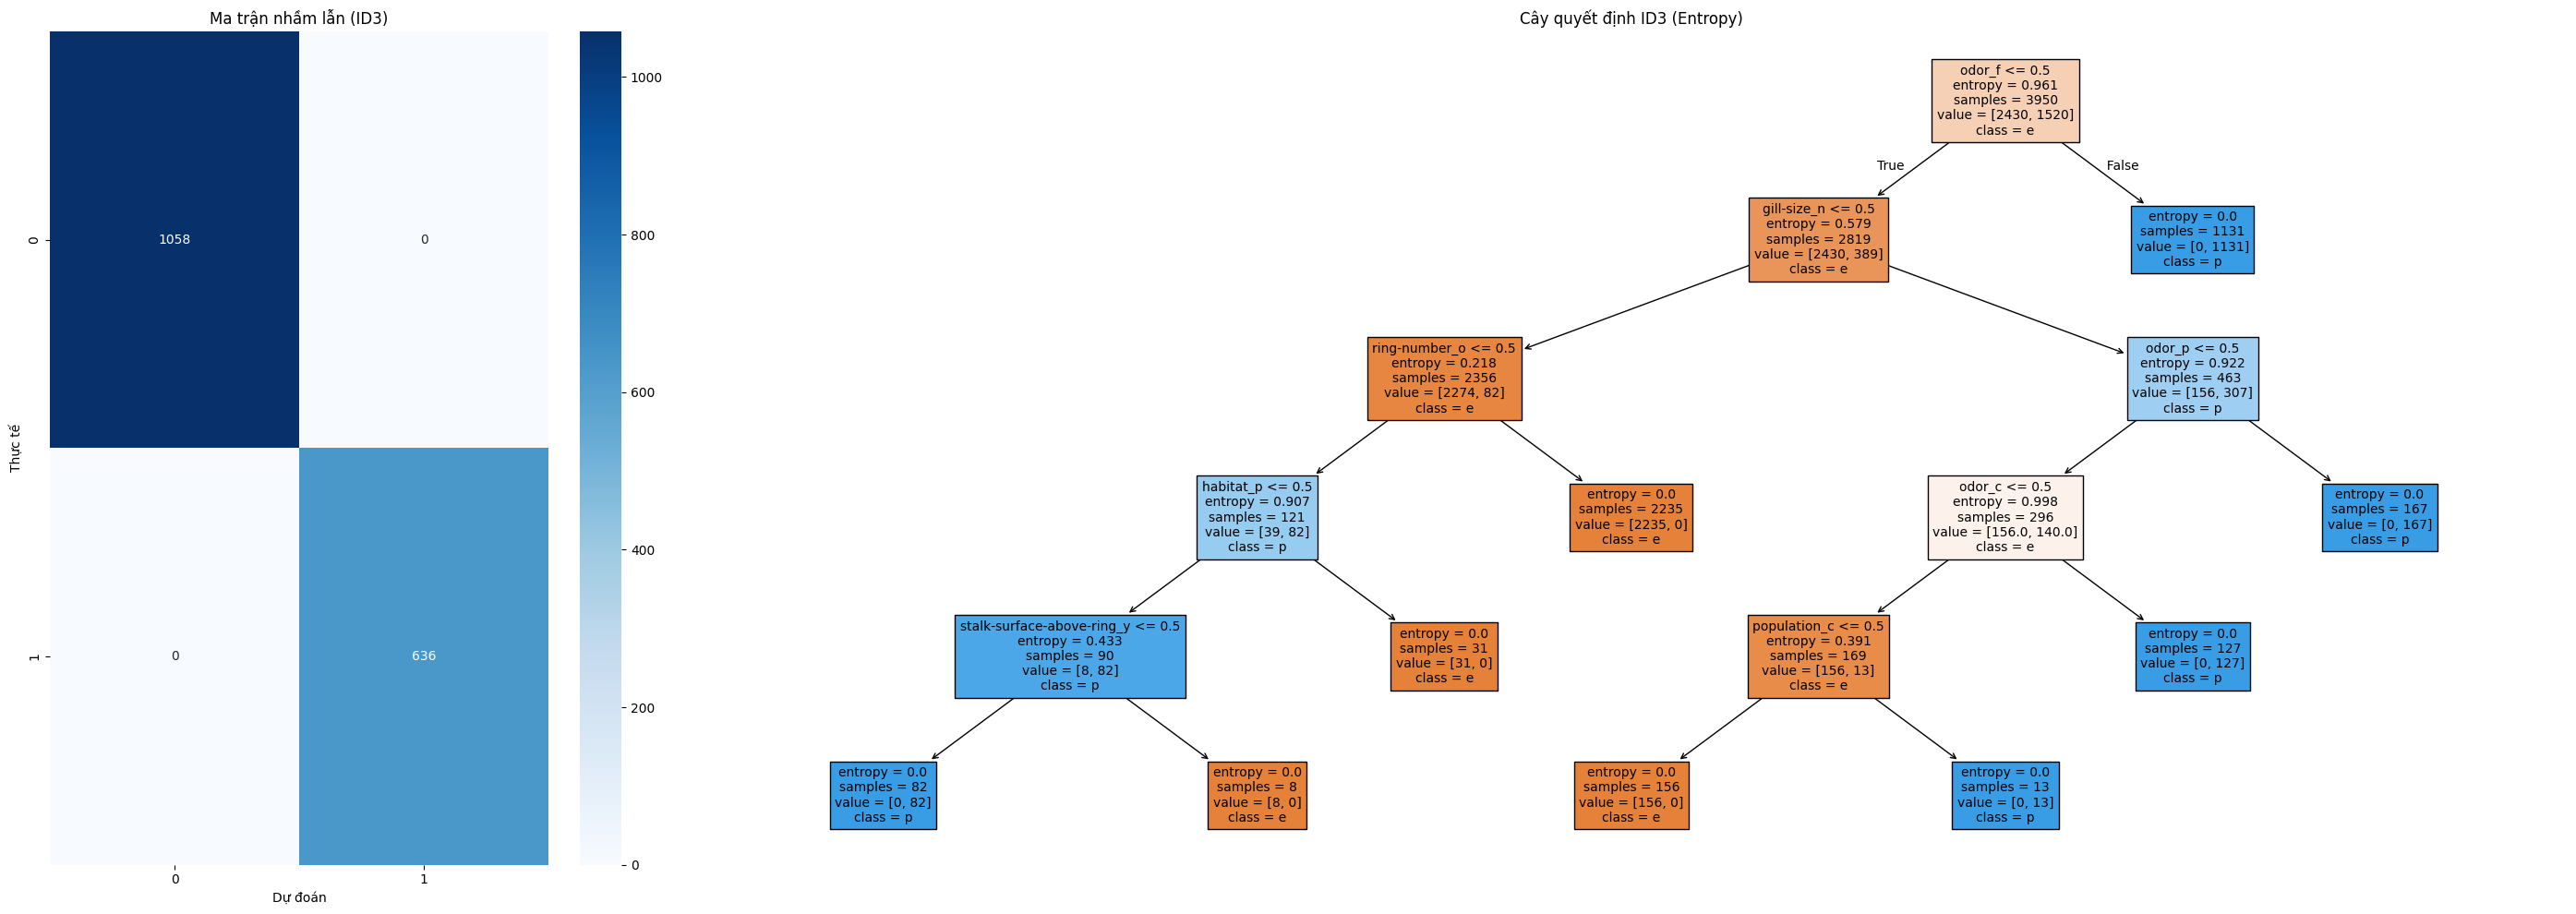

Nguyễn Đức Trung - 6351071072


In [6]:
# bài 6 trang 27 câu 7
# 1. Huấn luyện mô hình ID3 (Entropy)
id3_model = DecisionTreeClassifier(criterion='entropy', random_state=42, max_depth=None)
id3_model.fit(X_train, y_train)
# 2. Dự đoán
y_pred_id3 = id3_model.predict(X_test)
acc_id3 = accuracy_score(y_test, y_pred_id3)
conf_matrix_id3 = confusion_matrix(y_test, y_pred_id3)
print(f"Độ chính xác ID3: {acc_id3 * 100:.2f}%")
# 3. Vẽ hình
fig, ax = plt.subplots(1, 2, figsize=(28, 10), gridspec_kw={'width_ratios': [1, 3]})
# Ma trận nhầm lẫn
sns.heatmap(conf_matrix_id3, annot=True, fmt='d', cmap='Blues', ax=ax[0])
ax[0].set_title("Ma trận nhầm lẫn (ID3)")
ax[0].set_ylabel("Thực tế")
ax[0].set_xlabel("Dự đoán")
# Cây quyết định
plot_tree(id3_model, feature_names=X_encoded.columns, class_names=le.classes_, filled=True, fontsize=10, ax=ax[1])
ax[1].set_title("Cây quyết định ID3 (Entropy)")
plt.tight_layout()
plt.savefig('mushroom_id3.png', dpi=100)
plt.show()
print("Nguyễn Đức Trung - 6351071072")

Độ chính xác CART: 100.00%


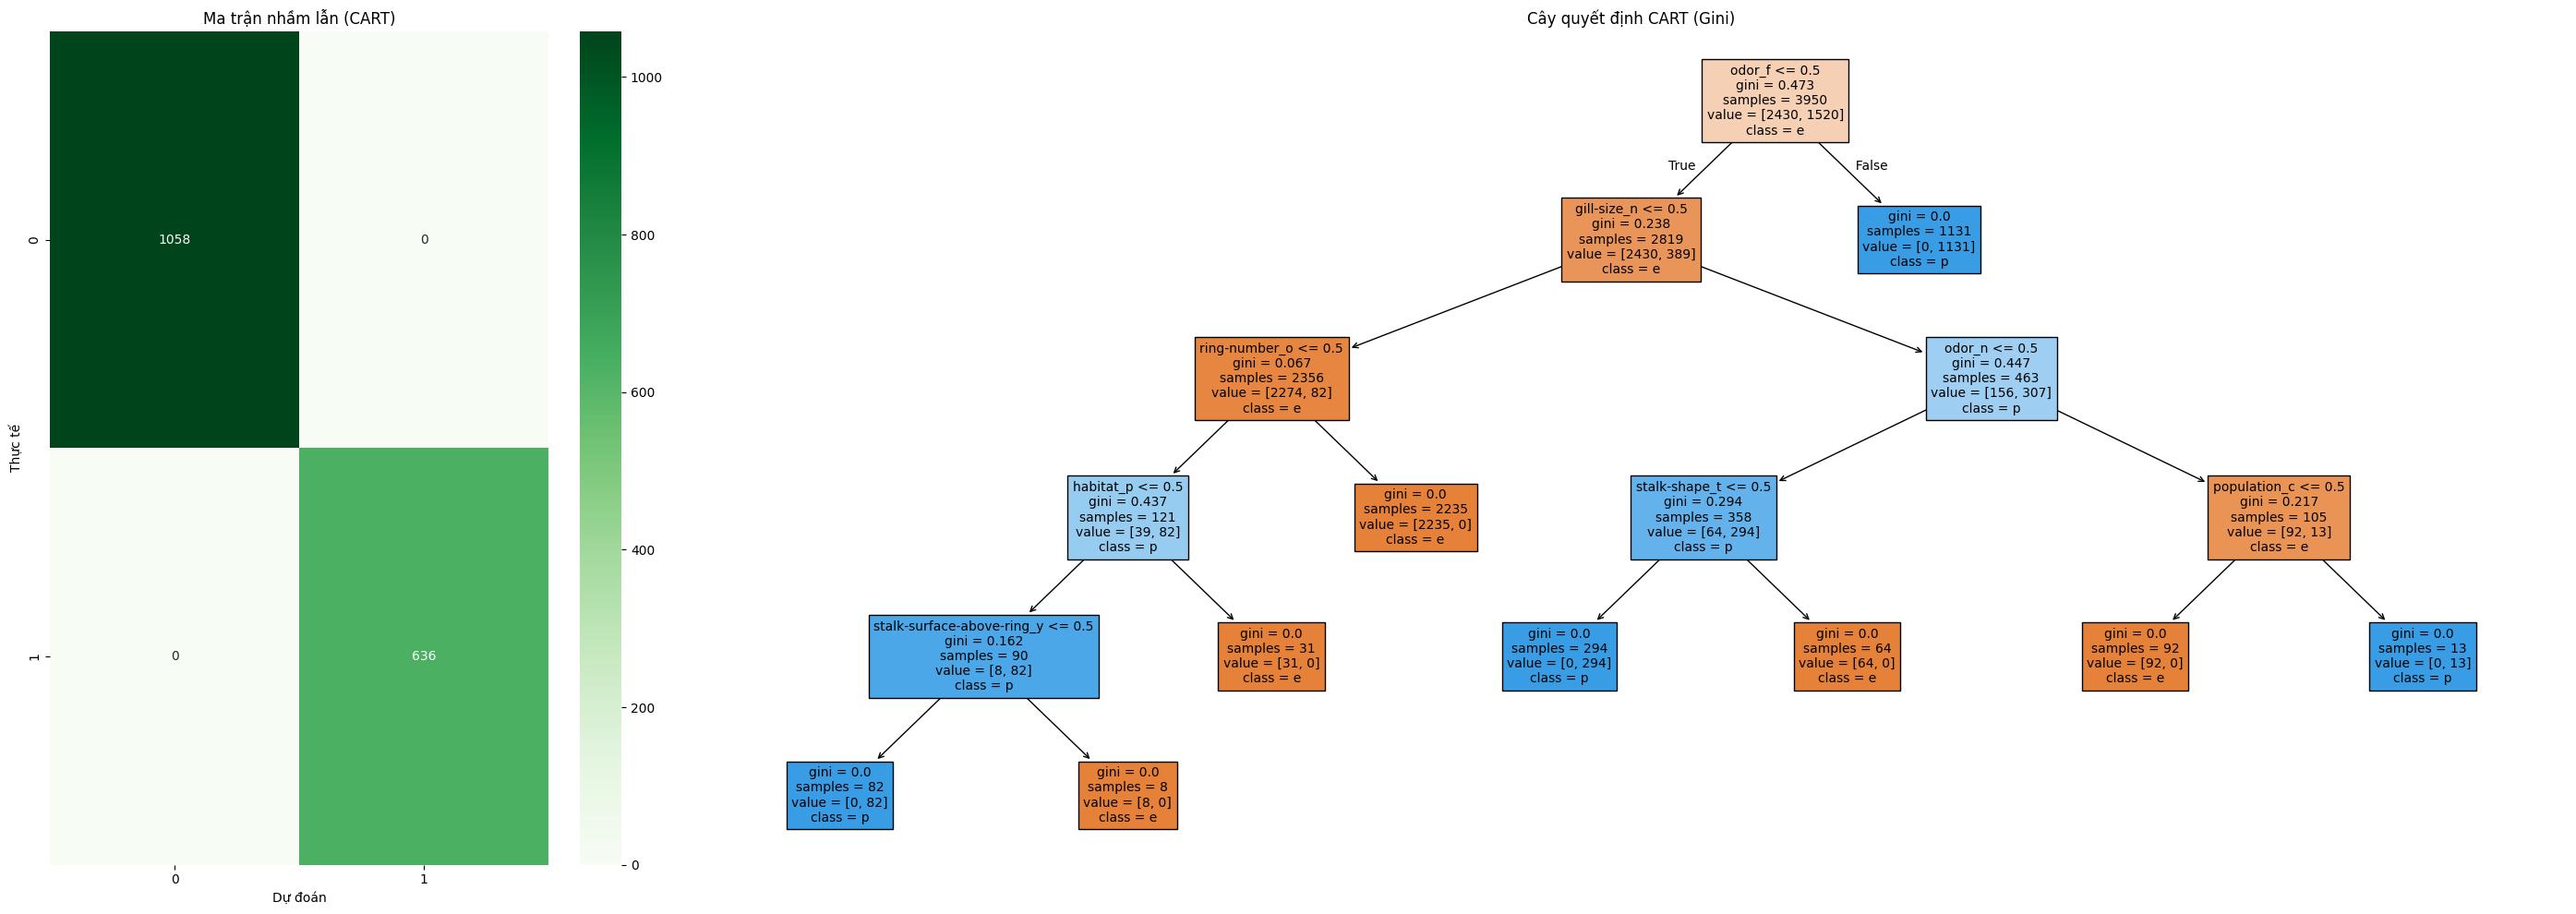

Nguyễn Đức Trung - 6351071072


In [8]:
# bài 6 trang 27 câu 8
# 1. Huấn luyện mô hình CART (Gini)
cart_model = DecisionTreeClassifier(criterion='gini', random_state=42, max_depth=None)
cart_model.fit(X_train, y_train)
# 2. Dự đoán
y_pred_cart = cart_model.predict(X_test)
acc_cart = accuracy_score(y_test, y_pred_cart)
conf_matrix_cart = confusion_matrix(y_test, y_pred_cart)
print(f"Độ chính xác CART: {acc_cart * 100:.2f}%")
# 3. Vẽ hình
fig, ax = plt.subplots(1, 2, figsize=(28, 10), gridspec_kw={'width_ratios': [1, 3]})
# Ma trận nhầm lẫn
sns.heatmap(conf_matrix_cart, annot=True, fmt='d', cmap='Greens', ax=ax[0])
ax[0].set_title("Ma trận nhầm lẫn (CART)")
ax[0].set_ylabel("Thực tế")
ax[0].set_xlabel("Dự đoán")
# Cây quyết định
plot_tree(cart_model, feature_names=X_encoded.columns, class_names=le.classes_, filled=True, fontsize=10, ax=ax[1])
ax[1].set_title("Cây quyết định CART (Gini)")
plt.tight_layout()
plt.savefig('mushroom_cart.png', dpi=100)
plt.show()
print("Nguyễn Đức Trung - 6351071072")

Độ chính xác Naïve Bayes: 99.65%


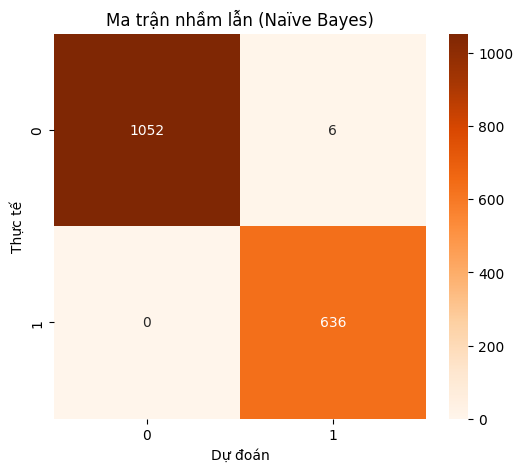

Nguyễn Đức Trung - 6351071072


In [9]:
# bài 6 trang 27 câu 9
# 1. Huấn luyện Naïve Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
# 2. Dự đoán
y_pred_nb = nb_model.predict(X_test)
acc_nb = accuracy_score(y_test, y_pred_nb)
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print(f"Độ chính xác Naïve Bayes: {acc_nb * 100:.2f}%")
# 3. Vẽ Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_nb, annot=True, fmt='d', cmap='Oranges')
plt.title("Ma trận nhầm lẫn (Naïve Bayes)")
plt.ylabel("Thực tế")
plt.xlabel("Dự đoán")
plt.show()
print("Nguyễn Đức Trung - 6351071072")

BẢNG SO SÁNH ĐỘ CHÍNH XÁC:
           Model  Accuracy
0  ID3 (Entropy)  1.000000
1    CART (Gini)  1.000000
2    Naïve Bayes  0.996458


/tmp/ipython-input-3409100789.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=results, palette='viridis')


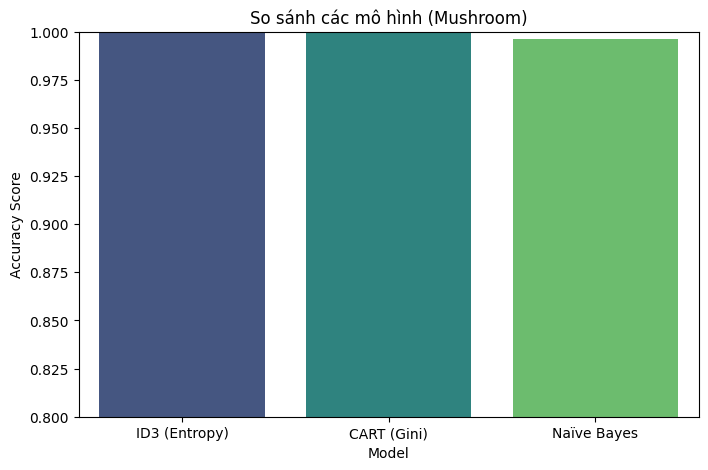

Nguyễn Đức Trung - 6351071072


In [10]:
# bài 6 trang 27 câu 10
results = pd.DataFrame({
    'Model': ['ID3 (Entropy)', 'CART (Gini)', 'Naïve Bayes'],
    'Accuracy': [acc_id3, acc_cart, acc_nb]
})
print("BẢNG SO SÁNH ĐỘ CHÍNH XÁC:")
print(results.sort_values(by='Accuracy', ascending=False))
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=results, palette='viridis')
plt.ylim(0.8, 1.0) # Zoom vào khoảng 80-100% vì bộ dữ liệu này thường có độ chính xác rất cao
plt.title("So sánh các mô hình (Mushroom)")
plt.ylabel("Accuracy Score")
plt.show()
print("Nguyễn Đức Trung - 6351071072")